In [748]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import approximations as a
import distributions as d
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
a = reload(a)
d = reload(d)
sm = reload(dmlt)

Populating the interactive namespace from numpy and matplotlib


In [749]:
#Create a test model - classify based on gender from impedance magnitude position S
GenderFromZS = dmlt.ODFC(a.ComplexFourier,d.UnweightedGaussianClassification,100)

In [750]:
#Load the relevant data
GenderZSData = GenderFromZS.load("impedance_data/ImpedanceGender.csv","impedance_data/ImpedanceS.csv",False,True)

#print sum(GenderZSData.getWeights(0))

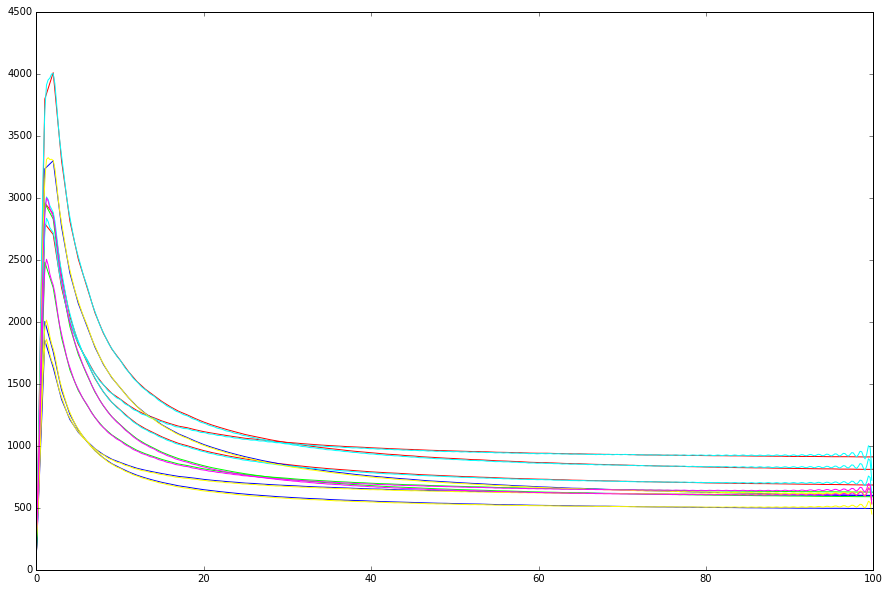

In [751]:
#Plot a few rows of the data

#Female
GenderFromZS.plotSample(GenderZSData,13,'#ff0000')
GenderFromZS.plotSample(GenderZSData,14,'#ff0000')
GenderFromZS.plotSample(GenderZSData,15,'#ff0000')

#Male
GenderFromZS.plotSample(GenderZSData,33,'#0000ff')
GenderFromZS.plotSample(GenderZSData,34,'#0000ff')
GenderFromZS.plotSample(GenderZSData,37,'#0000ff')

#Male test
GenderFromZS.plotSample(GenderZSData,4,'#00ff00')
GenderFromZS.plotSample(GenderZSData,9,'#00ff00')


#Also plot their approximations on top of them
GenderFromZS.plotApproximation(GenderZSData,13,'#00ffff')
GenderFromZS.plotApproximation(GenderZSData,14,'#00ffff')
GenderFromZS.plotApproximation(GenderZSData,15,'#00ffff')

GenderFromZS.plotApproximation(GenderZSData,33,'#ffff00')
GenderFromZS.plotApproximation(GenderZSData,34,'#ffff00')
GenderFromZS.plotApproximation(GenderZSData,37,'#ffff00')

GenderFromZS.plotApproximation(GenderZSData,4,'#ff00ff')
GenderFromZS.plotApproximation(GenderZSData,9,'#ff00ff')

plt.show()

In [752]:
#Pull out a subset
testSix = GenderFromZS.train(GenderZSData,[13,14,15,33,34,37])
print "Training with these 6:"
print testSix.getAllY()
print ""

#Check the probability they're male
print "Probability each is male:"
print [i[1] for i in GenderFromZS.predict(testSix,["Male" for i in range(6)])]
print ""

#And just classify them
print "Most likely classifications:"
print [i[0] for i in GenderFromZS.predict(testSix)]
print ""

#Test the accuracy of that subset
print "Accuracy of those 6:"
print "%d%%\n"%(GenderFromZS.test(testSix)*100.0 + 0.5)

#Train and test the whole set
GenderFromZS.train(GenderZSData)
print "Total accuracy: %d%%\n"%(GenderFromZS.test(GenderZSData)*100.0 + 0.5)

Training with these 6:
['Female', 'Female', 'Female', 'Male', 'Male', 'Male']

Probability each is male:
[0.2509425866532401, 0.026627488830904138, 0.14635145573604791, 0.84267461493438645, 0.62715004983586708, 0.6672760492034101]

Most likely classifications:
['Female', 'Female', 'Female', 'Male', 'Male', 'Male']

Accuracy of those 6:
79%

Total accuracy: 65%



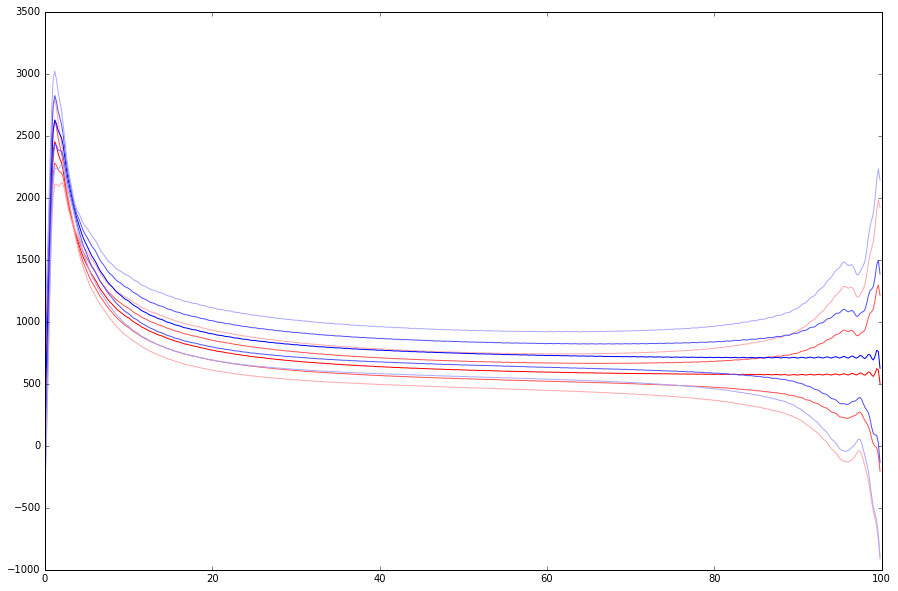

In [753]:
#GenderFromZS.plotSample(GenderZSData,13,'#ff0000')
#GenderFromZS.plotSample(GenderZSData,14,'#ff0000')
#GenderFromZS.plotSample(GenderZSData,15,'#ff0000')

#GenderFromZS.plotSample(GenderZSData,33,'#0000ff')
#GenderFromZS.plotSample(GenderZSData,34,'#0000ff')
#GenderFromZS.plotSample(GenderZSData,37,'#0000ff')

GenderFromZS.plotDistributionByClassification("Male","#ff0000")
GenderFromZS.plotDistributionByClassification("Female","#0000ff")

plt.show()

In [754]:
newData = GenderFromZS.genData("Male",3)
GenderFromZS.plotApproximation(newData,0,'#ff0000')
GenderFromZS.plotApproximation(newData,1,'#ff0000')
GenderFromZS.plotApproximation(newData,2,'#ff0000')

TypeError: can't convert complex to float